# Final assigment Noah Klein Wolterink

# Scope of research

Due to some problems I have unfortunately received limited resources when it comes to data on different long/lat coordinates for El Paso, Texas.

My predictive model is meant to give an insight on how these variables can play a role in correctly predicting the variable 'Average temperature Celcius'. Ultimately, I wanted to predict this variable for not only 1, but several coordinates across the city. I wanted to make a recommendation based on these predictions on where in the city there should be given more attention to the temperature. 

In [1]:
# import
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib as mlt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

# Data cleaning

To get started with cleaning the data, I had to retrieve data I wanted to use from somewhere. After some thorough research on the internet I found the website of the The National Climatic Data Center's (NCDC) that had sufficient data of the subject I wanted to make a predictive model on: Average temperature. The dataset originally consisted of 26548 rows however after finding out that only one location contained sufficient data for me to work with, there were 1826 left. 

My predictive model is meant to give an insight on how these variables can play a role in correctly predicting the variable 'Average temperature Celcius'. Ultimately, I wanted to predict this variable for not only 1, but several coordinates across the city. I wanted to make a recommendation based on these predictions on where in the city there should be given more attention to the temperature.

As for cleaning the data, I first selected the rows that contained data from El Paso International Airport. I then went on to select the columns I wanted to further work with and renamed those columns to names that are easier to understand. I replaced the NA values with 0's and continued by converting the values to values we are more familiar with in the Netherlands. Luckily, I found a page on Github with all the formulas on how to convert the values. I then picked the variables I thought would have the most impact on predicting the average temperature. My predictive model was now meant to predict the average temperature based on the variables: Maximum temperature Celcius, Minimum temperature Celcius, Direction of fastest 2-minute wind (Degrees), Direction of fastest 5-second wind (degrees), Fastest 2-minute wind speed mps, Fastest 5-second wind speed mps, Average wind speed mps, Week day and Month.

After showing the head of the dataframe I thought it was interesting to include the day of the week and month of each row as predictors, so I used datetime to extract these columns from the column 'Date'. Now that I had created the columns, I made them usable by transforming the columns into dummydata. I did this purely so I had numerical values as textual values couldn't be used for the model I wanted to use. I dropped the 'Month' and 'Week Day' columns because these columns were not necessarry anymore.



In [2]:
import pandas as pd

#url https://www.ncdc.noaa.gov/cdo-web/confirmation
df = pd.read_csv('2995453.csv', sep=',')

df = df.loc[df['NAME'] == 'EL PASO INTERNATIONAL AIRPORT, TX US'] #unfortunately the data I had retrieved from the website only contained useful information for one zipcode: The El Paso Internation Airport.

df = df[['NAME', 'DATE', 'AWND', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5']] #https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf

#changing the column names to somewhat more understandable names
df.rename(columns = {'AWND':'Average wind speed', 'TAVG':'Average temperature', 'TMAX':'Maximum temperature', 'TMIN':'Minimum temperature', 'WDF2':'Direction of fastest 2-minute wind (Degrees)', 'WDF5':'Direction of fastest 5-second wind (degrees)', 'WSF2':'Fastest 2-minute wind speed', 'WSF5':'Fastest 5-second wind speed'}, inplace = True)

df = df.fillna(0) #replacing NA's with 0's

#converting values to metric and celcius using: https://github.com/Roooommmmelllll/Python-Codes/blob/master/MPH%20Conversions.py

def fahr_to_celsius(temp_fahr): #converting Fahrenheit values to Celcius values
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

fahr_to_celsius(df["Average temperature"])

df["Average temperature Celcius"] = fahr_to_celsius(df["Average temperature"]) #Average temperature in Celcius degrees

df["Maximum temperature Celcius"] = fahr_to_celsius(df["Maximum temperature"]) #Minimum temperature in Celcius degrees

df["Minimum temperature Celcius"] = fahr_to_celsius(df["Minimum temperature"]) #Maximum temperature in Celcius degrees

def mph_to_mps(mph): #converting Mph values to Mps values
    """Convert Mph to Mps
    
    Return Mps conversion of input"""
    mps = (mph * 5280 * .3048 / 60 / 60)
    return mps

df["Average wind speed mps"] = mph_to_mps(df["Average wind speed"]) #Average wind speed in meters per second
df["Fastest 2-minute wind speed mps"] = mph_to_mps(df["Fastest 2-minute wind speed"]) #Fastest 2-minute wind speed in meters per second
df["Fastest 5-second wind speed mps"] = mph_to_mps(df["Fastest 5-second wind speed"]) #Fastest 5-second wind speed in meters per second

df = df[['NAME', 'DATE','Average temperature Celcius', 'Maximum temperature Celcius', 'Minimum temperature Celcius', 'Direction of fastest 2-minute wind (Degrees)', 'Direction of fastest 5-second wind (degrees)', 'Fastest 2-minute wind speed mps', 'Fastest 5-second wind speed mps', 'Average wind speed mps']]

df.head(100) #show first 100 columns to see if there are some noticable things going on

,NAME,DATE,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps
0,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-06,30.555556,36.666667,23.888889,80.0,80.0,11.220704,14.797024,3.701491
1,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-07,26.666667,34.444444,19.444444,340.0,340.0,16.495776,19.178016,3.598672
2,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-08,26.666667,35.000000,18.333333,250.0,250.0,11.220704,13.411200,3.097987
3,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-09,30.555556,37.777778,23.888889,250.0,250.0,9.790176,11.220704,3.097987
4,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-06-10,32.777778,38.333333,24.444444,250.0,250.0,10.684256,13.008864,5.601411
...,...,...,...,...,...,...,...,...,...,...
95,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-09,25.555556,31.111111,20.000000,110.0,100.0,8.091424,9.790176,2.999638
96,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-10,25.555556,32.222222,20.000000,100.0,110.0,8.896096,11.220704,3.799840
97,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-11,26.666667,33.333333,20.555556,110.0,40.0,5.409184,8.091424,2.101088
98,"EL PASO INTERNATIONAL AIRPORT, TX US",2017-09-12,26.666667,35.000000,16.666667,140.0,220.0,3.978656,5.811520,1.600403


In [3]:
dr = pd.date_range(start='2017-06-06', end='2022-06-04') #implementing weekdays by using datetime
df['Date'] = dr

df['Week Day'] = pd.to_datetime(dr).day_name() #as the first day of this dataset is tuesday, 'Week day' 1 will then be the first day of the week. Monday is stated as 'Week Day' 1.

df['Month'] = pd.DatetimeIndex(df['Date']).month_name()
df = df[['Average temperature Celcius', 'Maximum temperature Celcius', 'Minimum temperature Celcius', 'Direction of fastest 2-minute wind (Degrees)', 'Direction of fastest 5-second wind (degrees)', 'Fastest 2-minute wind speed mps', 'Fastest 5-second wind speed mps', 'Average wind speed mps', 'Week Day', 'Month']] #Drop date because datetime can't be included

dummies = pd.get_dummies(df[['Month', 'Week Day']])
df = pd.concat([df, dummies], axis=1)

df.drop('Month', axis=1, inplace=True)
df.drop('Week Day', axis=1, inplace=True)

df.head(10)

,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps,Month_April,Month_August,...,Month_November,Month_October,Month_September,Week Day_Friday,Week Day_Monday,Week Day_Saturday,Week Day_Sunday,Week Day_Thursday,Week Day_Tuesday,Week Day_Wednesday
0,30.555556,36.666667,23.888889,80.0,80.0,11.220704,14.797024,3.701491,0,0,...,0,0,0,0,0,0,0,0,1,0
1,26.666667,34.444444,19.444444,340.0,340.0,16.495776,19.178016,3.598672,0,0,...,0,0,0,0,0,0,0,0,0,1
2,26.666667,35.000000,18.333333,250.0,250.0,11.220704,13.411200,3.097987,0,0,...,0,0,0,0,0,0,0,1,0,0
3,30.555556,37.777778,23.888889,250.0,250.0,9.790176,11.220704,3.097987,0,0,...,0,0,0,1,0,0,0,0,0,0
4,32.777778,38.333333,24.444444,250.0,250.0,10.684256,13.008864,5.601411,0,0,...,0,0,0,0,0,1,0,0,0,0
5,31.666667,36.111111,26.111111,250.0,220.0,11.578336,15.691104,6.499962,0,0,...,0,0,0,0,0,0,1,0,0,0
6,30.000000,36.111111,20.555556,250.0,260.0,10.281920,13.008864,4.600042,0,0,...,0,0,0,0,1,0,0,0,0,0
7,30.555556,36.111111,22.222222,250.0,250.0,11.220704,13.902944,3.898189,0,0,...,0,0,0,0,0,0,0,0,1,0
8,30.000000,38.888889,18.333333,250.0,250.0,7.599680,9.387840,3.401974,0,0,...,0,0,0,0,0,0,0,0,0,1
9,31.111111,40.555556,18.888889,250.0,250.0,8.091424,8.896096,2.400605,0,0,...,0,0,0,0,0,0,0,1,0,0


# Exploratory data analysis
I now want to analyze the data I have in front of me. By using 'df.describe()' I could see what the mean, standard deviation and  other statistics were for the variables. 

You can find relevant patterns in data through exploratory data analysis (metrics, graphs and tables) in Python (Jupyter Notebook).

In [4]:
df.describe() #show values to better understand the data

,Average temperature Celcius,Maximum temperature Celcius,Minimum temperature Celcius,Direction of fastest 2-minute wind (Degrees),Direction of fastest 5-second wind (degrees),Fastest 2-minute wind speed mps,Fastest 5-second wind speed mps,Average wind speed mps,Month_April,Month_August,...,Month_November,Month_October,Month_September,Week Day_Friday,Week Day_Monday,Week Day_Saturday,Week Day_Sunday,Week Day_Thursday,Week Day_Tuesday,Week Day_Wednesday
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,...,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,19.919330,26.888889,12.619482,200.953425,199.546301,9.523863,12.601139,3.714447,0.082192,0.084932,...,0.082192,0.084932,0.082192,0.143014,0.142466,0.143014,0.142466,0.143014,0.143014,0.143014
std,8.700591,8.789343,8.845818,97.033129,95.942841,3.578794,4.855230,1.728110,0.274732,0.278856,...,0.274732,0.278856,0.274732,0.350183,0.349623,0.350183,0.349623,0.350183,0.350183,0.350183
min,-7.777778,0.555556,-17.777778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.222222,19.444444,5.555556,120.000000,120.000000,6.705600,8.896096,2.498954,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.111111,27.777778,13.333333,240.000000,240.000000,9.387840,12.114784,3.401974,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.222222,34.444444,20.555556,270.000000,270.000000,11.220704,15.691104,4.501693,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,36.666667,43.888889,28.888889,360.000000,360.000000,27.314144,36.701984,14.501978,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\noahk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


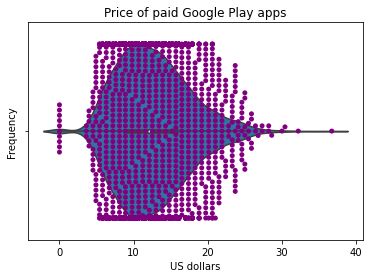

In [5]:
sns.violinplot(df['Fastest 5-second wind speed mps'])
sns.swarmplot(df['Fastest 5-second wind speed mps'], color='purple') #default color doesn't stand out
plt.title('Price of paid Google Play apps')
plt.ylabel('Frequency')
plt.xlabel('US dollars')
plt.show()

C:\Users\noahk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


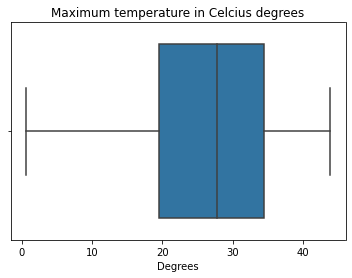

In [6]:
sns.boxplot(df['Maximum temperature Celcius'])
plt.title('Maximum temperature in Celcius degrees')
plt.xlabel('Degrees')
plt.show()

Text(0, 0.5, 'Occurance by frequency of days')

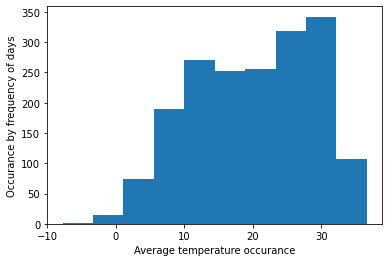

In [7]:
plt.hist(df['Average temperature Celcius'])
plt.xlabel('Average temperature occurance')
plt.ylabel('Occurance by frequency of days')

In [8]:
num = df[["Average wind speed mps", "Average temperature Celcius", "Direction of fastest 2-minute wind (Degrees)", "Fastest 5-second wind speed mps"]]
num.corr() #checking whether there are any correlations between these given variables

,Average wind speed mps,Average temperature Celcius,Direction of fastest 2-minute wind (Degrees),Fastest 5-second wind speed mps
Average wind speed mps,1.000000,0.162862,0.247884,0.783599
Average temperature Celcius,0.162862,1.000000,0.009258,0.275461
Direction of fastest 2-minute wind (Degrees),0.247884,0.009258,1.000000,0.263917
Fastest 5-second wind speed mps,0.783599,0.275461,0.263917,1.000000


# Model building
Waarom ik randomforest koos en waarom
random forest vs k nearest neighbor

You can explain why you choose for a certain model.
You can explain which variables you enter in your model, and why.
You can set up the model correctly in Python.
You can set the parameters of your model to optimize the results.

https://towardsdatascience.com/considerations-when-choosing-a-machine-learning-model-aa31f52c27f3

In [9]:
X = df.loc[:,'Maximum temperature Celcius':'Week Day_Wednesday']
y = df['Average temperature Celcius'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn import datasets
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [11]:
rf.score(X_test,y_test)

0.2791970802919708

# Evaluation
So the accuracy of the test is 26.8%. Given the fact that there are x variables in play that generally don't have a lot of influence on the temperature, a score of almost 27% could be considered quite well. Considering some of the most impactful variables (such as rainfall and clouds) are not included, the test actually scores rather well.

In [12]:
# Make predictions for the test set
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -1       0.00      0.00      0.00         1
           0       1.00      0.25      0.40         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.67      0.33      0.44         6
           5       0.33      0.12      0.18         8
           6       0.21      0.50      0.30         8
           7       0.62      0.24      0.34        21
           8       0.10      0.06      0.07        18
           9       0.00      0.00      0.00         7
          10       0.17      0.29      0.21        21
          11       0.14      0.36      0.20        14
          12       0.22      0.12      0.16        16
          13       0.20      0.23      0.21        13
          14       0.00      0.00      0.00        15
          15       0.23    

C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noahk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As can be seen here the weighted average precision is 27%, whilst the accuracy for the f-1score also is 27%.

In [13]:
rf.classes_

array([-7,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36])

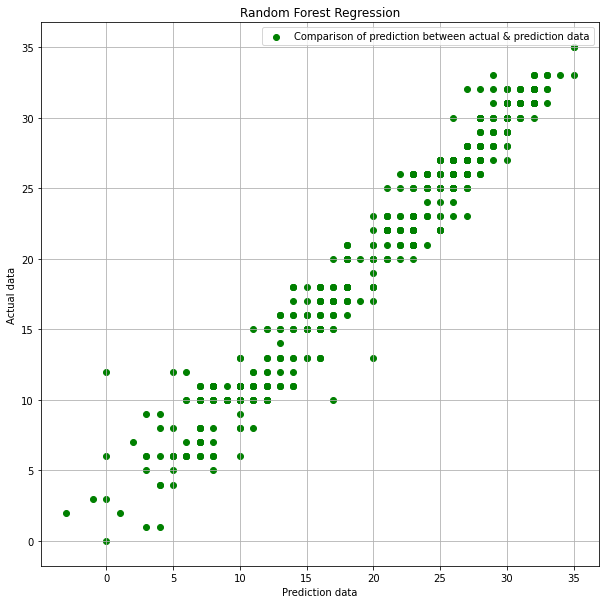

In [14]:
plt.figure(figsize= (10, 10))
plt.scatter(y_test, y_pred, color = 'green', label='Comparison of prediction between actual & prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

As you can see, the scatterplot shows actual data vs predicted data

In [15]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 2]], dtype=int64)

# APA Documentation
URL: https://www.ncdc.noaa.gov/cdo-web/confirmation \
Explanation on orginial codes for variables: https://www.ncei.noaa.gov/data/daily-summaries/doc/GHCND_documentation.pdf \
Used for conversion Fahrenheit to Celcius and Mph to Mps: https://github.com/Roooommmmelllll/Python-Codes/blob/master/MPH%20Conversions.py



